In [1]:
import pandas as pd 
terrorism = pd.read_csv('terrorism/terrorism.csv', sep=';')
terrorism.columns = terrorism.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('-', '')

/Users/fmeijer/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (4,31,33,61,62,63,70,76,79,90,92,94,96,101,107,112,114,115,117,118,119,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
terrorism.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191464 entries, 0 to 191463
Data columns (total 135 columns):
eventid               int64
iyear                 int64
imonth                int64
iday                  int64
approxdate            object
extended              int64
resolution            object
country               int64
country_txt           object
region                int64
region_txt            object
provstate             object
city                  object
latitude              object
longitude             object
specificity           float64
vicinity              int64
location              object
summary               object
crit1                 int64
crit2                 int64
crit3                 int64
doubtterr             int64
alternative           float64
alternative_txt       object
multiple              int64
success               int64
suicide               int64
attacktype1           int64
attacktype1_txt       object
attacktype2           float64
at

In [3]:
terrorism[terrorism.duplicated(['eventid'])]

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,int_log,int_ideo,int_misc,int_any,related


## Tien meest dodelijke aanvallen tussen 1970 en 2018

In [4]:
terrorism[['nkill', 'iyear', 'imonth', 'iday', 'country_txt', 'city', 'gname']].sort_values('nkill', ascending=False).reset_index().head(10)

,index,nkill,iyear,imonth,iday,country_txt,city,gname
0,133551,1570.0,2014,6,12,Iraq,Tikrit,Islamic State of Iraq and the Levant (ISIL)
1,73137,1385.0,2001,9,11,United States,New York City,Al-Qaida
2,73138,1385.0,2001,9,11,United States,New York City,Al-Qaida
3,55932,1180.0,1994,4,13,Rwanda,Gikoro,Hutu extremists
4,136316,953.0,2014,8,3,Iraq,Sinjar,Islamic State of Iraq and the Levant (ISIL)
5,133257,670.0,2014,6,10,Iraq,Badush,Islamic State of Iraq and the Levant (ISIL)
6,179820,588.0,2017,10,14,Somalia,Mogadishu,Al-Shabaab
7,76364,518.0,2004,3,21,Nepal,Dhading district,Communist Party of Nepal- Maoist (CPN-M)
8,136779,517.0,2014,8,19,Syria,Unknown,Islamic State of Iraq and the Levant (ISIL)
9,187960,466.0,2018,8,10,Afghanistan,Ghazni,Taliban


 ## Welke jaren hadden de meeste slachtoffers en hoe ontwikkelt zich over tijd? 

In [5]:
most_casualties = terrorism[['iyear', 'nkill']].fillna(0)

In [6]:
most_casualties.groupby('iyear').nkill.sum().reset_index().sort_values('nkill', ascending=False).head(10)

,iyear,nkill
43,2014,44492.0
44,2015,38853.0
45,2016,34858.0
46,2017,26568.0
47,2018,22987.0
42,2013,22273.0
41,2012,15501.0
36,2007,12824.0
26,1997,10924.0
14,1984,10450.0


In [7]:
total_per_year = most_casualties.groupby('iyear').nkill.sum().reset_index()

In [8]:
total_per_year.sort_values('iyear', ascending=False).head()

,iyear,nkill
47,2018,22987.0
46,2017,26568.0
45,2016,34858.0
44,2015,38853.0
43,2014,44492.0


In [9]:
total_per_year = total_per_year.set_index('iyear')

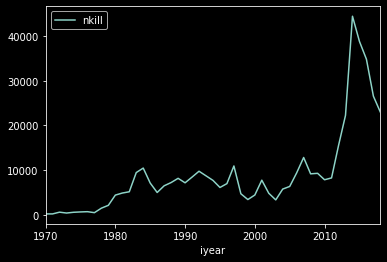

In [10]:
total_per_year.plot()

## Welke landen hadden de meeste aanvallen te verduren tussen 1970 en 2018?

In [11]:
terrorism.country_txt.value_counts().head(10)

Iraq              26057
Pakistan          14847
Afghanistan       14509
India             12853
Colombia           8515
Philippines        7509
Peru               6108
United Kingdom     5335
El Salvador        5320
Somalia            4674
Name: country_txt, dtype: int64

## Welke groepen pleegden de meeste aanslagen? 

In [12]:
terrorism.gname.value_counts().head(10)

Unknown                                             86261
Taliban                                              8727
Islamic State of Iraq and the Levant (ISIL)          6385
Shining Path (SL)                                    4562
Al-Shabaab                                           3774
Farabundo Marti National Liberation Front (FMLN)     3351
New People's Army (NPA)                              3054
Irish Republican Army (IRA)                          2669
Boko Haram                                           2665
Revolutionary Armed Forces of Colombia (FARC)        2490
Name: gname, dtype: int64

## In welke landen plegen deze groepen de meeste aanslagen?

In [13]:
country_group = terrorism[['gname', 'country_txt']]

In [14]:
country_group.groupby('gname')['country_txt'].agg(pd.Series.mode)

gname
1 May                                                                         Greece
14 K Triad                                                                     Macau
14 March Coalition                                                           Lebanon
14th of December Command                                                       Chile
15th of September Liberation Legion                                       Costa Rica
16 January Organization for the Liberation of Tripoli                        Lebanon
1920 Revolution Brigades                                                        Iraq
19th of July Christian Resistance Brigade                                  Nicaragua
1st of May Group                                                      United Kingdom
2 April Group                                            [Argentina, United Kingdom]
20 December Movement (M-20)                                                   Panama
22 May 1948                                                

In [15]:
cg = country_group.groupby('gname')['country_txt'].agg(pd.Series.mode).to_frame()

In [16]:
df = terrorism.gname.value_counts().rename_axis('gname').reset_index(name='count')

## Wat zijn de terroristengroepen met de meeste aanslagen, en waar plegen ze de meeste aanslagen
### NB: 'count' is hier hoeveel aanslagen de groep in totaal pleegt, niet hoeveel aanslagen die pleegde in dat land

In [23]:
merged.sort_values('count', ascending=False).head(10)

,gname,country_txt,count
3485,Unknown,Iraq,86261
3212,Taliban,Afghanistan,8727
1566,Islamic State of Iraq and the Levant (ISIL),Iraq,6385
3014,Shining Path (SL),Peru,4562
179,Al-Shabaab,Somalia,3774
1144,Farabundo Marti National Liberation Front (FMLN),El Salvador,3351
2315,New People's Army (NPA),Philippines,3054
1515,Irish Republican Army (IRA),United Kingdom,2669
717,Boko Haram,Nigeria,2665
2776,Revolutionary Armed Forces of Colombia (FARC),Colombia,2490


## Welk type aanval komt het meest voor tussen 1970 en 2018?

In [25]:
terrorism.attacktype1_txt.value_counts().head(10)

Bombing/Explosion                      91842
Armed Assault                          45251
Assassination                          20117
Hostage Taking (Kidnapping)            12138
Facility/Infrastructure Attack         11017
Unknown                                 8267
Unarmed Assault                         1096
Hostage Taking (Barricade Incident)     1048
Hijacking                                688
Name: attacktype1_txt, dtype: int64

## Welk doelwit komt het meest voor?

In [26]:
terrorism.targtype1_txt.value_counts().head(10)

Private Citizens & Property       46283
Military                          29978
Police                            26023
Government (General)              22274
Business                          21277
Transportation                     6929
Unknown                            6449
Utilities                          6158
Religious Figures/Institutions     4693
Educational Institution            4500
Name: targtype1_txt, dtype: int64

## Welke nationaliteit hebben de slachtoffers meestal? 

In [27]:
terrorism.natlty1_txt.value_counts().head(10)

Iraq             25522
Pakistan         14377
India            13002
Afghanistan      12567
Colombia          8125
Philippines       7287
Peru              5852
El Salvador       5212
United States     5169
Turkey            4757
Name: natlty1_txt, dtype: int64

## Slachtoffersnationaliteit en land van aanslag gecombineerd: 

In [28]:
ct = terrorism.country_txt.value_counts().rename_axis('country_txt').reset_index(name='no_attacks')

In [29]:
nt = terrorism.natlty1_txt.value_counts().rename_axis('country_txt').reset_index(name='when_victims')

In [30]:
dataframe = pd.merge(ct, nt, on='country_txt')

In [31]:
dataframe.sort_values('when_victims', ascending=False).head(10)

,country_txt,no_attacks,when_victims
0,Iraq,26057,25522
1,Pakistan,14847,14377
3,India,12853,13002
2,Afghanistan,14509,12567
4,Colombia,8515,8125
5,Philippines,7509,7287
6,Peru,6108,5852
8,El Salvador,5320,5212
16,United States,2926,5169
11,Turkey,4391,4757


In [32]:
dataframe.sort_values('no_attacks', ascending=False).head(10)

,country_txt,no_attacks,when_victims
0,Iraq,26057,25522
1,Pakistan,14847,14377
2,Afghanistan,14509,12567
3,India,12853,13002
4,Colombia,8515,8125
5,Philippines,7509,7287
6,Peru,6108,5852
7,United Kingdom,5335,21
8,El Salvador,5320,5212
9,Somalia,4674,3586


## Top tien dodelijkste aanvallen met target type en slachtoffersnationaliteit

In [33]:
terrorism[['nkill', 'iyear', 'imonth', 'iday', 'country_txt', 'city' ,'gname', 'targtype1_txt', 'natlty1_txt']].sort_values('nkill', ascending=False).reset_index().head(10)

,index,nkill,iyear,imonth,iday,country_txt,city,gname,targtype1_txt,natlty1_txt
0,133551,1570.0,2014,6,12,Iraq,Tikrit,Islamic State of Iraq and the Levant (ISIL),Military,Iraq
1,73137,1385.0,2001,9,11,United States,New York City,Al-Qaida,Private Citizens & Property,United States
2,73138,1385.0,2001,9,11,United States,New York City,Al-Qaida,Private Citizens & Property,United States
3,55932,1180.0,1994,4,13,Rwanda,Gikoro,Hutu extremists,Private Citizens & Property,Rwanda
4,136316,953.0,2014,8,3,Iraq,Sinjar,Islamic State of Iraq and the Levant (ISIL),Private Citizens & Property,Iraq
5,133257,670.0,2014,6,10,Iraq,Badush,Islamic State of Iraq and the Levant (ISIL),Police,Iraq
6,179820,588.0,2017,10,14,Somalia,Mogadishu,Al-Shabaab,Business,Somalia
7,76364,518.0,2004,3,21,Nepal,Dhading district,Communist Party of Nepal- Maoist (CPN-M),Government (General),Nepal
8,136779,517.0,2014,8,19,Syria,Unknown,Islamic State of Iraq and the Levant (ISIL),Military,Syria
9,187960,466.0,2018,8,10,Afghanistan,Ghazni,Taliban,Private Citizens & Property,Afghanistan


## Aanvallen in België

In [34]:
belgium_attacks = terrorism[['country_txt', 'city', 'iyear', 'imonth', 'iday', 'nkill', 'gname']]

In [35]:
belgium_attacks[belgium_attacks['country_txt'] == 'Belgium'].sort_values('nkill', ascending=False).reset_index().head(10)

,index,country_txt,city,iyear,imonth,iday,nkill,gname
0,160364,Belgium,Zaventem,2016,3,22,18.0,Islamic State of Iraq and the Levant (ISIL)
1,160365,Belgium,Brussels,2016,3,22,17.0,Islamic State of Iraq and the Levant (ISIL)
2,26613,Belgium,Aalst,1985,11,9,7.0,Crazy Brabant Killers
3,64934,Belgium,Brussels,1997,3,17,4.0,Unknown
4,185890,Belgium,Liege,2018,5,29,4.0,Jihadi-inspired extremists
5,132388,Belgium,Brussels,2014,5,24,4.0,Islamic State of Iraq and the Levant (ISIL)
6,14603,Belgium,Antwerp,1981,10,20,3.0,Unknown
7,24883,Belgium,Brussels,1985,5,1,2.0,Communist Combattant Cells (CCC) (Belgium)
8,37759,Belgium,Brussels,1989,3,30,2.0,Soldiers of Truth
9,14038,Belgium,Brussels,1981,8,4,2.0,Unknown


## Meest recente aanvallen

In [36]:
recent_attacks = terrorism[['iyear', 'region_txt']]

In [37]:
recent_attacks.groupby('iyear')['region_txt'].agg(pd.Series.mode).to_frame().sort_values('iyear', ascending=False).head(10)

,region_txt
iyear,
2018,South Asia
2017,Middle East & North Africa
2016,Middle East & North Africa
2015,Middle East & North Africa
2014,Middle East & North Africa
2013,South Asia
2012,South Asia
2011,South Asia
2010,South Asia
